In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset from the provided CSV file link
data = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows of the dataset
print(data.head())

# Preprocessing
# Fill missing age values with median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Drop unnecessary columns
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Convert 'Sex' to numerical values (0 for male, 1 for female)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numeric values (C = 0, Q = 1, S = 2)
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Check for any remaining missing values and handle them
if data.isnull().sum().sum() > 0:
    print("There are still missing values in the dataset.")
    # Fill any remaining missing values with median or drop rows as needed
    data.fillna(data.median(), inplace=True)

# Prepare features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training using Random Forest Classifier
model = RandomForestClassifier(random_state=42)

try:
    model.fit(X_train, y_train)
except ValueError as e:
    print(f"Error during model fitting: {e}")
    exit()

# Predictions and evaluation
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Th

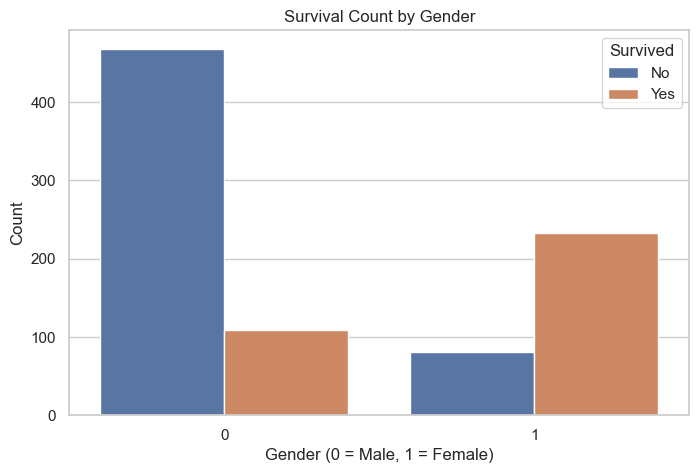

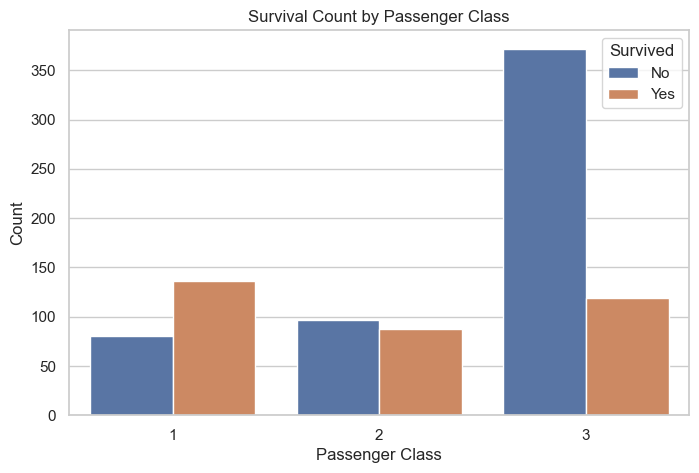

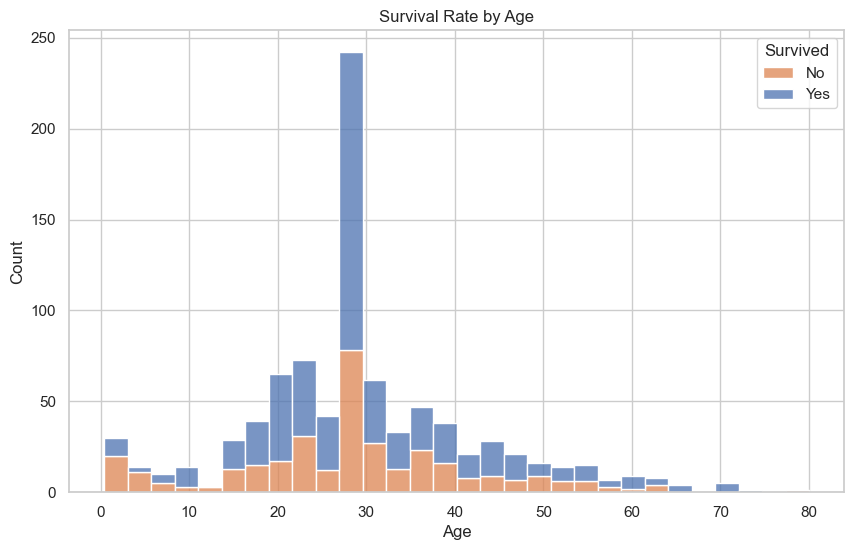

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Plot survival count by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival Count by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Plot survival count by passenger class (Pclass)
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Plot survival rate by age
plt.figure(figsize=(10, 6))
sns.histplot(data=data[data['Age'].notnull()], x='Age', hue='Survived', multiple="stack", bins=30)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
